**Name: Irtiza Akram**

**DHC-678**

In [1]:
# Install libraries
!pip install seaborn nltk wordcloud plotly


In [ ]:
# Install libraries
!pip install seaborn nltk wordcloud plotly

# %%
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import style
style.use('ggplot')
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import nltk
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings

# %%


# Download NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
# Download punkt_tab for tokenization
nltk.download('punkt_tab') # This line was added to download the missing data package.

# %%
# Suppress warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
# Suppress warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load data
df = pd.read_csv('IMDB Dataset.csv')
df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
# Basic info
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


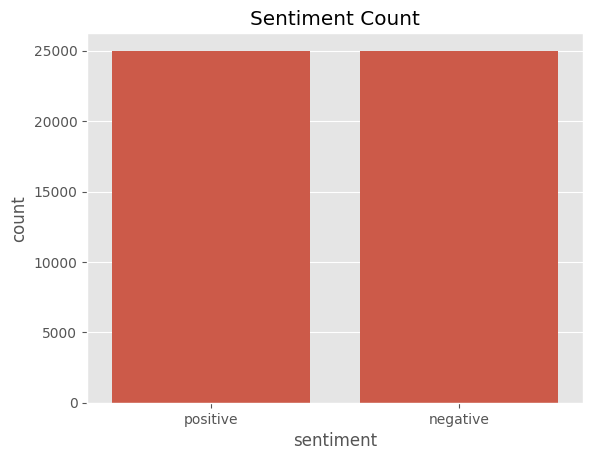

In [ ]:
# Visualize sentiment count
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Count')
plt.show()


In [ ]:
# Show some examples
for i in range(5):
  print(df['review'][i])
  print(df['review'].iloc[i], "\n")
  print("sentiment: ", df['sentiment'].iloc[i], "\n\n")

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fac

In [ ]:
# Add word count
def no_of_words(text):
    return len(text.split())
df['word count'] = df['review'].apply(no_of_words)

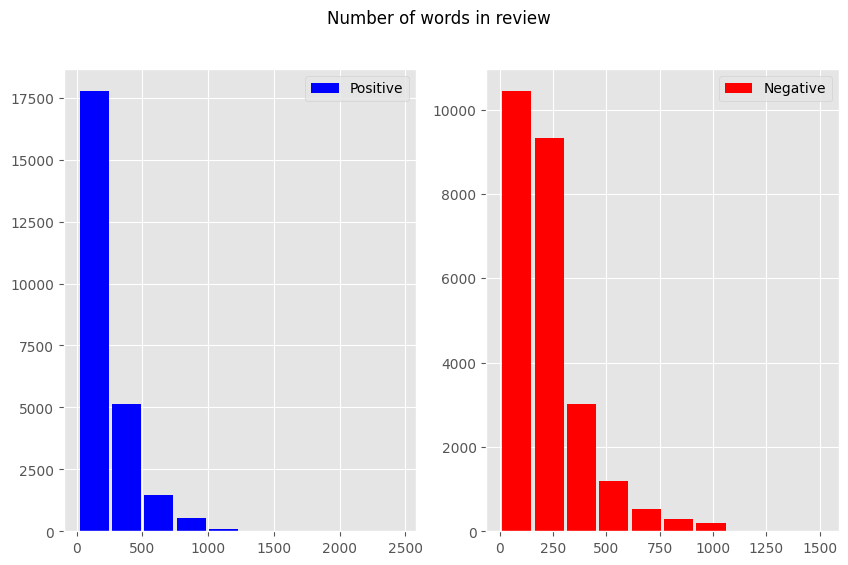

In [ ]:
# Histograms of word counts
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
ax[0].hist(df[df['sentiment'] == 'positive']['word count'], label='Positive', color='blue', rwidth=0.9)
ax[0].legend(loc='upper right')
ax[1].hist(df[df['sentiment'] == 'negative']['word count'], label='Negative', color='red', rwidth=0.9)
ax[1].legend(loc='upper right')
fig.suptitle("Number of words in review")
plt.show()

In [ ]:
# Replace sentiment with numeric values
df.sentiment.replace("positive", 1, inplace=True)
df.sentiment.replace("negative", 2, inplace=True)

In [ ]:
# Preprocessing functions
stop_words = set(stopwords.words('english'))

def data_processing(text):
  text = text.lower()
  text = re.sub('<br />', '', text)
  text = re.sub(r"https\S+|wwwS+|https\S+", '', text, flags=re.MULTILINE)
  text = re.sub(r'\@\w+|\#', '', text)
  text = re.sub(r'[^\w\s]', '', text)
  text_tokens = word_tokenize(text)
  filtered_text = [w for w in text_tokens if not w in stop_words]
  return " ".join(filtered_text)

stemmer = PorterStemmer()

def stemming(text):
  return " ".join([stemmer.stem(word) for word in text.split()])

In [ ]:
# Apply preprocessing
df['review'] = df['review'].apply(data_processing)
df['review'] = df['review'].apply(stemming)


In [ ]:
# Remove duplicates
print("Number of duplicated rows:", df.duplicated().sum())


Number of duplicated rows: 421


In [ ]:
# Recalculate word count
df['word count'] = df['review'].apply(no_of_words)

In [ ]:
# Positive reviews word count
pos_reviews = df[df.sentiment == 1].reset_index(drop=True)
count = Counter()
for text in pos_reviews['review'].values:
  for word in text.split():
    count[word] += 1
pos_words = pd.DataFrame(count.most_common(15), columns=['word', 'count'])
px.bar(pos_words, x='count', y='word', title='Common words in Positive reviews', color='word')

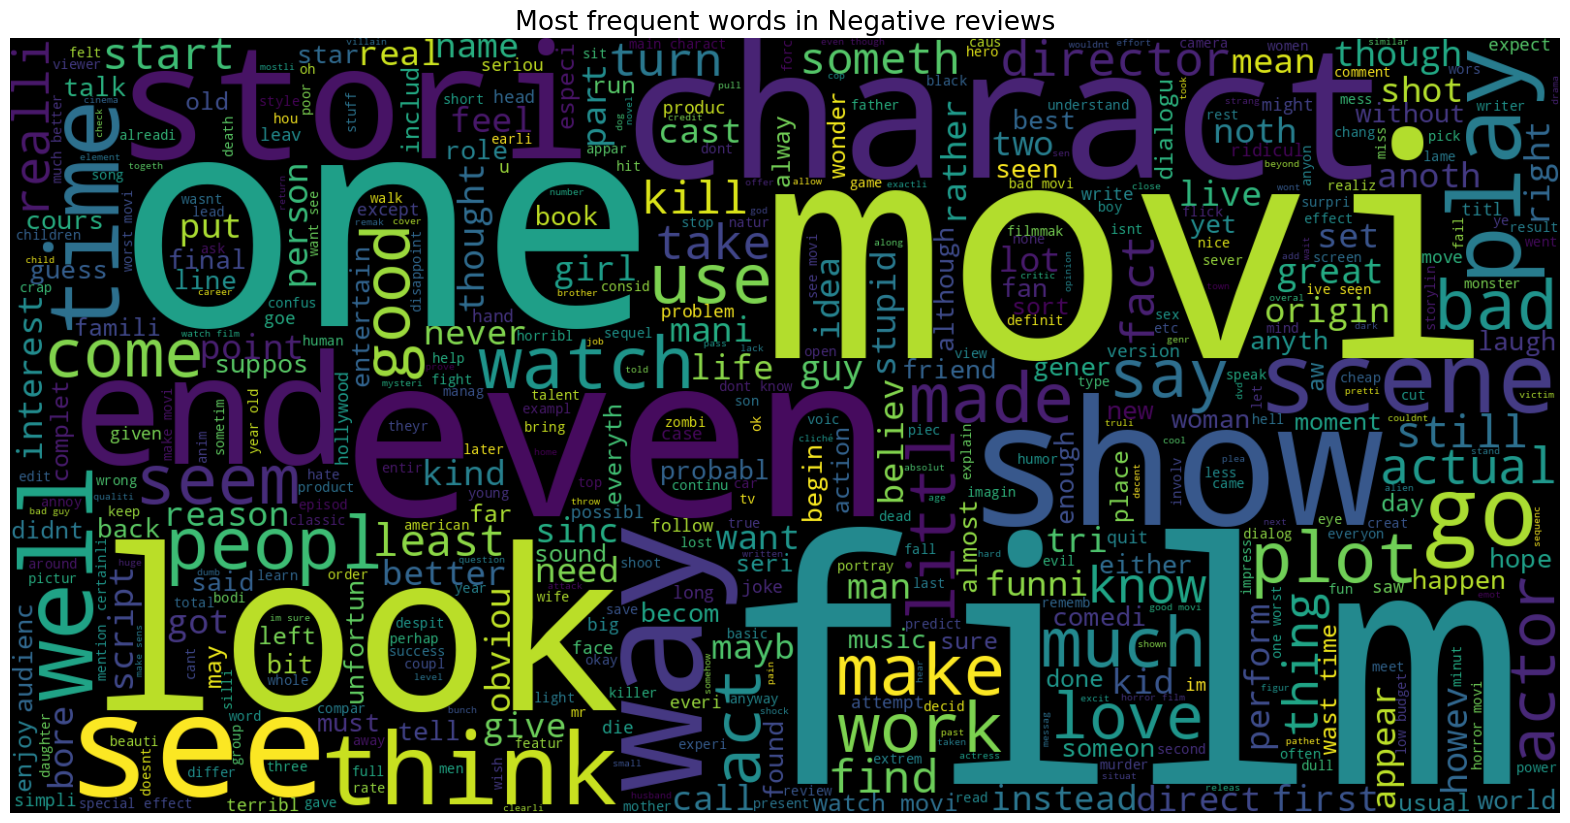

In [ ]:
# Negative reviews wordcloud
neg_reviews = df[df.sentiment == 2]
text = ' '.join([word for word in neg_reviews['review']])
plt.figure(figsize=(20, 15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in Negative reviews', fontsize=19)
plt.show()

In [ ]:
# Negative words count
count = Counter()
for text in neg_reviews['review'].values:
  for word in text.split():
    count[word] += 1
neg_words = pd.DataFrame(count.most_common(15), columns=['word', 'count'])
px.bar(neg_words, x='count', y='word', title='Common words in Negative reviews', color='word')


In [ ]:
# Train-test split
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer object
vect = TfidfVectorizer()

# Fit the vectorizer to the 'review' column and transform it
X = vect.fit_transform(df['review'])

# Assign the 'sentiment' column to Y
Y = df['sentiment']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
# Train models
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

mnb = MultinomialNB()
mnb.fit(x_train, y_train)

svc = LinearSVC()
svc.fit(x_train, y_train)

LinearSVC()

In [ ]:
# Evaluate models
for name, model in zip(['Logistic Regression', 'Naive Bayes', 'Linear SVC'], [logreg, mnb, svc]):
  pred = model.predict(x_test)
  acc = accuracy_score(y_test, pred)
  print(f"{name} Accuracy: {acc * 100:.2f}%")
  print(confusion_matrix(y_test, pred))
  print(classification_report(y_test, pred))


Logistic Regression Accuracy: 88.99%
[[6836  753]
 [ 898 6513]]
              precision    recall  f1-score   support

           1       0.88      0.90      0.89      7589
           2       0.90      0.88      0.89      7411

    accuracy                           0.89     15000
   macro avg       0.89      0.89      0.89     15000
weighted avg       0.89      0.89      0.89     15000

Naive Bayes Accuracy: 85.83%
[[6368 1221]
 [ 904 6507]]
              precision    recall  f1-score   support

           1       0.88      0.84      0.86      7589
           2       0.84      0.88      0.86      7411

    accuracy                           0.86     15000
   macro avg       0.86      0.86      0.86     15000
weighted avg       0.86      0.86      0.86     15000

Linear SVC Accuracy: 89.29%
[[6844  745]
 [ 862 6549]]
              precision    recall  f1-score   support

           1       0.89      0.90      0.89      7589
           2       0.90      0.88      0.89      7411

    acc

In [ ]:
# Manual testing
def manual_testing(review_text, vectorizer, wordopt_func, models_dict):
    review_df = pd.DataFrame({'text': [review_text]})
    review_df['text'] = review_df['text'].apply(wordopt_func)
    vector_input = vectorizer.transform(review_df['text'])
    results = {}
    for name, model in models_dict.items():
        prediction = model.predict(vector_input)[0]
        sentiment = "Positive" if prediction == 1 else "Negative"
        results[name] = sentiment
    return results

In [ ]:
# Dictionary of models
models = {
    'Logistic Regression': logreg,
    'Naive Bayes': mnb,
    'Linear SVC': svc
}

# Test with input
user_review = input("Enter a movie review: ")
results = manual_testing(user_review, vect, data_processing, models)
for model_name, sentiment in results.items():
    print(f"{model_name} Prediction: {sentiment}")


Enter a movie review: I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson, in this she managed to tone down her "sexy" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than "Devil Wears Prada" and more interesting than "Superman" a great comedy to go see with friends.
Logistic Regression Prediction: Positive
Naive Baye